In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('afreeca_tv.csv')

In [3]:
data.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,1440,10069 > 60315 [ACK] Seq=1 Ack=1 Win=509 Len=...
1,2,0.000019,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,440,"10069 > 60315 [PSH, ACK] Seq=1381 Ack=1 Win=..."
2,3,0.000032,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,1440,10069 > 60315 [ACK] Seq=1761 Ack=1 Win=509 L...
3,4,0.000044,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,381,"10069 > 60315 [PSH, ACK] Seq=3141 Ack=1 Win=..."
4,5,0.000276,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,1440,10069 > 60315 [ACK] Seq=3462 Ack=1 Win=509 L...


In [4]:
data.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           2
dtype: int64

In [5]:
data1 = data.copy()
data1.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,1440,10069 > 60315 [ACK] Seq=1 Ack=1 Win=509 Len=...
1,2,0.000019,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,440,"10069 > 60315 [PSH, ACK] Seq=1381 Ack=1 Win=..."
2,3,0.000032,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,1440,10069 > 60315 [ACK] Seq=1761 Ack=1 Win=509 L...
3,4,0.000044,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,381,"10069 > 60315 [PSH, ACK] Seq=3141 Ack=1 Win=..."
4,5,0.000276,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,TCP,1440,10069 > 60315 [ACK] Seq=3462 Ack=1 Win=509 L...


In [6]:
data1 = data1.drop(['No.', 'Protocol', 'Info'], axis = 1)
data1.head()

,Time,Source,Destination,Length
0,0.000000,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,1440
1,0.000019,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,440
2,0.000032,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,1440
3,0.000044,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,381
4,0.000276,64:ff9b::3b15:dd36,2001:2d8:e66a:6a64:1017:2d59:1a1a:ea66,1440


In [7]:
p = data1.Source.str.startswith('64')
data1.loc[p, 'Source'] = 'phone'
p = data1.Destination.str.startswith('64')
data1.loc[p, 'Destination'] = 'phone'

In [8]:
b = data1.Source.str.contains(':')
data1.loc[b, 'Source'] = 'base'
b = data1.Destination.str.contains(':')
data1.loc[b, 'Destination'] = 'base'

In [9]:
data1.Source.unique(), data1.Destination.unique()

(array(['phone', 'base'], dtype=object),
 array(['base', 'phone'], dtype=object))

In [10]:
data1['Link'] = data1.apply(lambda a: "UL" if a.Source == 'phone' else "DL", axis = 1)

In [11]:
data1

,Time,Source,Destination,Length,Link
0,0.000000,phone,base,1440,UL
1,0.000019,phone,base,440,UL
2,0.000032,phone,base,1440,UL
3,0.000044,phone,base,381,UL
4,0.000276,phone,base,1440,UL
...,...,...,...,...,...
812750,2180.868426,phone,base,415,UL
812751,2180.868437,base,phone,60,DL
812752,2180.868448,phone,base,1440,UL
812753,2180.868459,phone,base,250,UL


In [12]:
ul = []
dl = []
columns = ['time', 'traffic']

for i in data1.values:
    if i[4] == "UL":
        ul.append([i[0], int(i[3])])
    elif i[4] == "DL":
        dl.append([i[0], int(i[3])])

ul = np.array(ul)
dl = np.array(dl)

In [13]:
a = np.arange(1, 2182)    # sec + 1
a = set(a)
b = []
ult = ul.T[0]
for i in ult:
    b.append(int(i))
b = set(b)
print(a-b)

{2181, 937, 914, 787, 1074, 1112}


In [14]:
ul_bitrate = []
dl_bitrate = []

tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in ul:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(ul) - 1:
        tps = tps * 8 / 1000
        ul_bitrate.append([cnt, tps])


In [15]:
a = np.arange(1, 2182)
a = set(a)
b = []
dlt = dl.T[0]
for i in dlt:
    b.append(int(i))
b = set(b)
print(a-b)

{2181, 937, 1611, 914, 787, 1074, 1112}


In [16]:
tps = 0    # traffic per second
cnt = 1
not_measured = list(a-b)

for i, j in dl:
    time = i
    traffic = j
    
    tps += traffic

    if int(i) == cnt:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        cnt += 1
        tps = 0
    if cnt in not_measured:
        cnt += 1
    
    if i == len(dl) - 1:
        tps = tps * 8 / 1000
        dl_bitrate.append([cnt, tps])
        

In [47]:
print(len(ul_bitrate))
print(len(dl_bitrate))

2175
2174


In [17]:
ul_bitrate = np.array(ul_bitrate)
dl_bitrate = np.array(dl_bitrate)

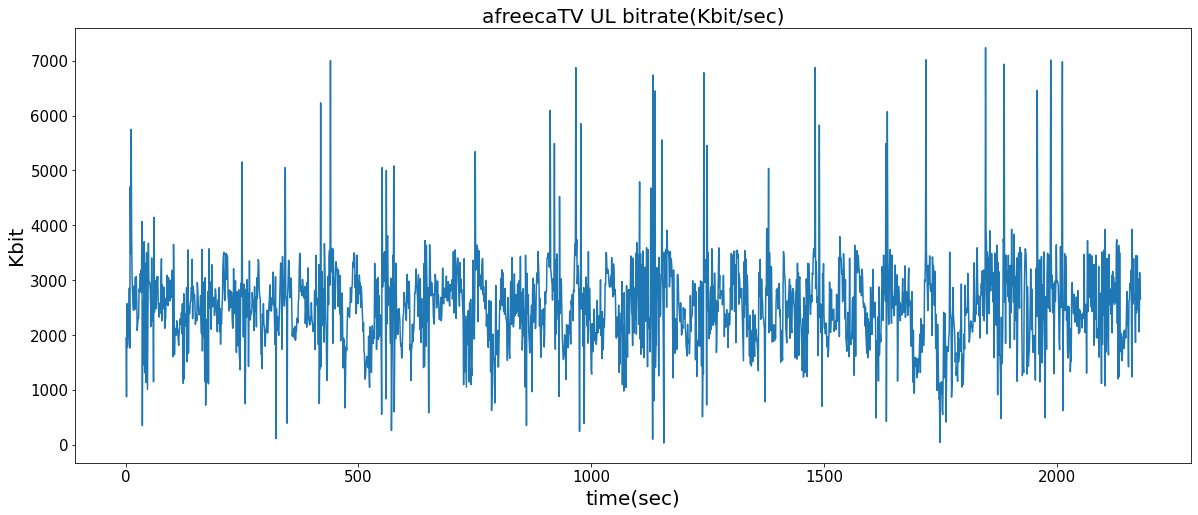

In [18]:
plt.figure(figsize=(20,8))
plt.title('afreecaTV UL bitrate(Kbit/sec)', fontsize=20)
plt.xlabel('time(sec)', fontsize=20)
plt.ylabel('Kbit', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot(ul_bitrate[:,0], ul_bitrate[:,1])
plt.show()

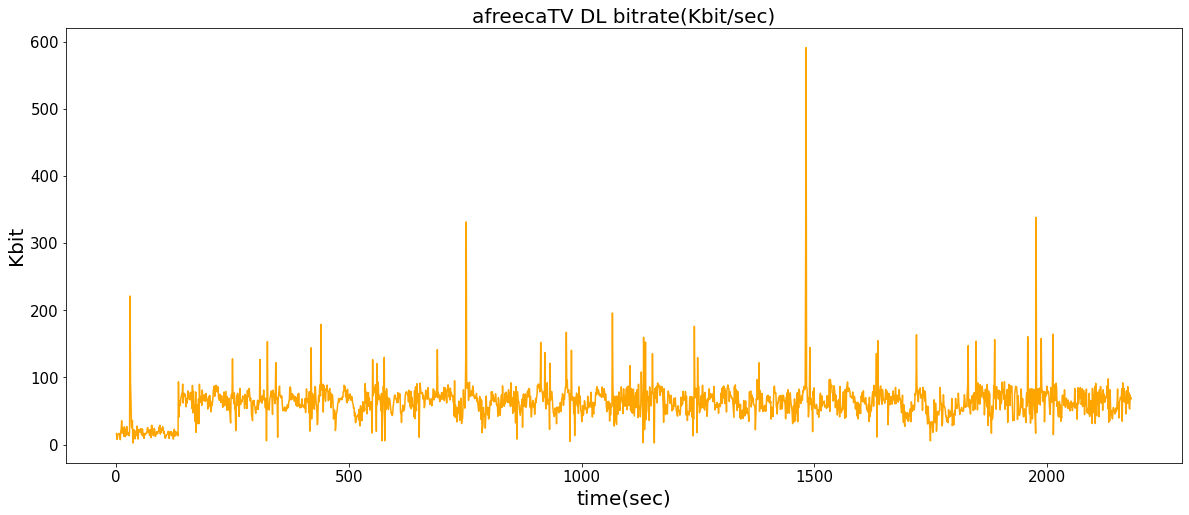

In [19]:
plt.figure(figsize=(20,8))
plt.title('afreecaTV DL bitrate(Kbit/sec)', fontsize=20)
plt.xlabel('time(sec)', fontsize=20)
plt.ylabel('Kbit', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot(dl_bitrate[:,0], dl_bitrate[:,1], color ='orange')
plt.show()

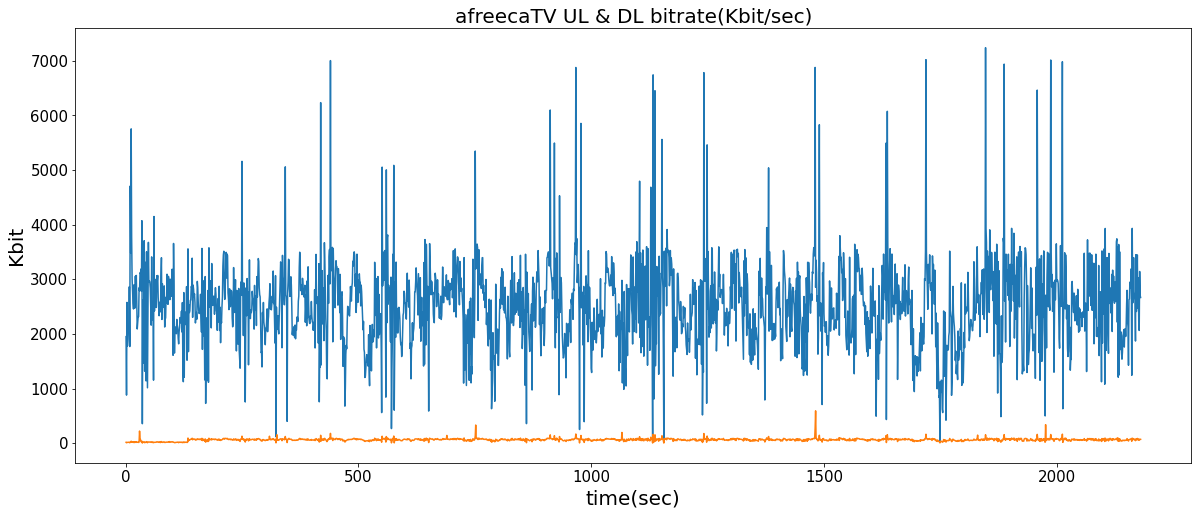

In [20]:
plt.figure(figsize=(20,8))
plt.title('afreecaTV UL & DL bitrate(Kbit/sec)', fontsize=20)
plt.xlabel('time(sec)', fontsize=20)
plt.ylabel('Kbit', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot(ul_bitrate[:,0], ul_bitrate[:,1])
plt.plot(dl_bitrate[:,0], dl_bitrate[:,1])
plt.show()

In [154]:
df = pd.DataFrame(ul_bitrate)
df

,0,1
0,1.0,1949.280
1,2.0,879.592
2,3.0,2575.640
3,4.0,1777.808
4,5.0,1896.512
...,...,...
2169,2175.0,3023.192
2170,2176.0,2230.024
2171,2177.0,2062.424
2172,2178.0,3141.144


In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [172]:
seq= df[[1]].to_numpy()

In [174]:
def seq2dataset(seq,window, horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x= seq[i:i+window]
        y= seq[i+window+horizon-1]
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7
h=1

X,Y= seq2dataset(seq,w,h)

In [175]:
split = int(len(X)*0.7)
x_train= X[0:split]; y_train = Y[0:split]
x_test= X[split:]; y_test = Y[split:]

In [176]:
model=Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist=model.fit(x_train,y_train, epochs=200, batch_size=1, validation_data=(x_test,y_test), verbose=1)

Epoch 1/200
1516/1516 [==============================] - 3s 2ms/step - loss: 577.2912 - mae: 577.2912 - val_loss: 558.1313 - val_mae: 558.1313
Epoch 2/200
1516/1516 [==============================] - 3s 2ms/step - loss: 524.0449 - mae: 524.0449 - val_loss: 595.6564 - val_mae: 595.6564
Epoch 3/200
1516/1516 [==============================] - 3s 2ms/step - loss: 522.3425 - mae: 522.3425 - val_loss: 559.0887 - val_mae: 559.0887
Epoch 4/200
1516/1516 [==============================] - 2s 2ms/step - loss: 514.3714 - mae: 514.3714 - val_loss: 541.8809 - val_mae: 541.8809
Epoch 5/200
1516/1516 [==============================] - 3s 2ms/step - loss: 517.1666 - mae: 517.1666 - val_loss: 545.7358 - val_mae: 545.7358
Epoch 6/200
1516/1516 [==============================] - 3s 2ms/step - loss: 514.5844 - mae: 514.5844 - val_loss: 544.3452 - val_mae: 544.3452
Epoch 7/200
1516/1516 [==============================] - 3s 2ms/step - loss: 507.8080 - mae: 507.8080 - val_loss: 543.2216 - val_mae: 543.2216

In [177]:
ev=model.evaluate(x_test,y_test, verbose=0)
print("손실 함수", ev[0], "MAE:",ev[1])

손실 함수 544.2615966796875 MAE: 544.2615966796875


In [179]:
pred=model.predict(x_test)
print("평균 절댓값 백분율 오차(MAPE)", sum(abs(y_test-pred)/y_test)/len(x_test))

평균 절댓값 백분율 오차(MAPE) [0.30086577]


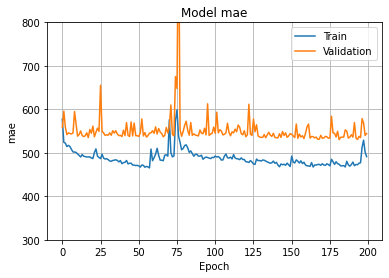

In [182]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([300, 800])
plt.legend(['Train', 'Validation'],loc='best')
plt.grid()
plt.show()

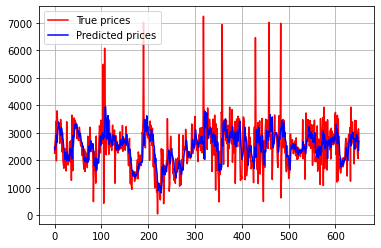

In [181]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()